# Exploratery Data Analysis of Germen_Credit_Data Analysis

# Introduction 
The dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository.
 The given dataset is realted with credit data analysis of german bank. 
 It based on strategic decision of bankers for loan approval and related parameters for credit mapping of customers.
If bank cusomer applied for credit loan then bank will have two types of risks are associated with the bank’s decision –

If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank.
with this objective refrence we will proceed our further analysis.



Columns of the dataset and their meaning are as follows;
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (text - little, moderate, rich)
7. Credit amount (numeric, in Deutsche Mark)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others


# Objectives:
1. To Load the dataset get a peek at the underlying data in the dataframe.
2. To explore Dimensions of the dataframe
3. To analyse Information about the schema
4. To map Statistical metrics of each column
5. To apply  pre-processing to interpret and impute Missing values, Erroneous/wrong values,Skewed data and Outliers.
6. To Perform exploratory data analysis and provide key insights derived from dataset with suitable graphs and plots to examine-
   - Distribution of numerical variables
   - Distribution of categorical variables
   - Numerical vs Categorical plots
   - Numerical vs Numerical plots

In [1]:

import numpy as np # This library imported for working with linear algebra numpy functionalities used for EDA
import pandas as pd # This library imported for data processing, read CSV file I/O (e.g. pd.read_csv) and working with dataframes.
import matplotlib.pyplot as plt # This library imported for working visualization and plottong graphs
from sklearn.impute import SimpleImputer #This library imported to implement handling of missing values, imputation of missing values and treating outliers.
import missingno as msno #To working with missimg values and its pattern
import plotly.express as px # To working plotly figures and graphs
import seaborn as sns # This library imported for working visualization and plottong graphs

# 1.Load the dataset into pandas and get a peek at the underlying data in the dataframe.

In [2]:
#Load/Import and Read DataSet Germen_Credit_Data
germen_credit = pd.read_csv("german_credit_data.csv",index_col=0)

original_df = germen_credit.copy() #Copied dataset to keep original dataset as available at primary 

# Brief Overview:
The first phase of this project is to see what is our data made about. Which variables are numerical or categorical and which columns have "Null" values, which is something we will address in the feature engineering phase.

In [3]:
#To check no. of observations and columns in dataset
germen_credit.shape

(1000, 9)

The germen_credit has 1000 observations and 09 variables

In [4]:
germen_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [5]:
germen_credit.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


# Observation Summary:
In germen_credit dataset We have Age,job,Credit amount and duration Four numeric type and sex ,Housing,Saving Accounts,Checking accounts and Purpose 5 columns are categorical.
Many of columns in dataset needs to be rename due to space between words in column name,it will difficult to read in ML. 

In [6]:
#Rename Columns
germen_credit=germen_credit.rename(columns={'Saving accounts':'Saving_Accounts','Checking account':'Checking_Account','Credit amount':'Credit_Amount'})

In [7]:
#Describe numeric columns
germen_credit.describe()

,Age,Job,Credit_Amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


# Observation Summary based describe results for numeric :
In germen_credit dataset We have Age,job,Credit amount and duration Four numeric type but job column include scaling values as 1,2,3 which are scales for 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled.
It also display count as 1000 observations ,mean, std,IQR and min max for numeric columns.

In [8]:
#Describe numeric and categorical columns
germen_credit.describe(include='all')

,Age,Sex,Job,Housing,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Purpose
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8
top,NaN,male,NaN,own,little,little,NaN,NaN,car
freq,NaN,690,NaN,713,603,274,NaN,NaN,337
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN


In [9]:
#To check unique values in Age
germen_credit.Age.unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59])

In [10]:
#To check unique values in Sex
germen_credit.Sex.unique()

array(['male', 'female'], dtype=object)

In [11]:
#To check unique values in Housing
germen_credit.Housing.unique()

array(['own', 'free', 'rent'], dtype=object)

In [12]:
#To check unique values in Saving_Accounts
germen_credit.Saving_Accounts.unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [13]:
#To check unique values in Checkin_Accounts
germen_credit.Checking_Account.unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [14]:
#To check unique values in Credit_Amount
germen_credit.Credit_Amount.unique()


array([ 1169,  5951,  2096,  7882,  4870,  9055,  2835,  6948,  3059,
        5234,  1295,  4308,  1567,  1199,  1403,  1282,  2424,  8072,
       12579,  3430,  2134,  2647,  2241,  1804,  2069,  1374,   426,
         409,  2415,  6836,  1913,  4020,  5866,  1264,  1474,  4746,
        6110,  2100,  1225,   458,  2333,  1158,  6204,  6187,  6143,
        1393,  2299,  1352,  7228,  2073,  5965,  1262,  3378,  2225,
         783,  6468,  9566,  1961,  6229,  1391,  1537,  1953, 14421,
        3181,  5190,  2171,  1007,  1819,  2394,  8133,   730,  1164,
        5954,  1977,  1526,  3965,  4771,  9436,  3832,  5943,  1213,
        1568,  1755,  2315,  1412, 12612,  2249,  1108,   618,  1409,
         797,  3617,  1318, 15945,  2012,  2622,  2337,  7057,  1469,
        2323,   932,  1919,  2445, 11938,  6458,  6078,  7721,  1410,
        1449,   392,  6260,  7855,  1680,  3578,  7174,  2132,  4281,
        2366,  1835,  3868,  1768,   781,  1924,  2121,   701,   639,
        1860,  3499,

In [15]:
#To check unique values in duration
germen_credit.Duration.unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])

In [16]:
#To check unique values in Purpose
germen_credit.Purpose.unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [17]:
#To check null values in dataset
germen_credit.isnull().sum().sort_values(ascending=False)

Checking_Account    394
Saving_Accounts     183
Purpose               0
Duration              0
Credit_Amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

# Observation Summary based describe results  :
In germen_credit dataset found missing or erroneous values in Saving_Accounts=183	Checking_Account=394	columns.

In [18]:
germen_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_Accounts   817 non-null    object
 5   Checking_Account  606 non-null    object
 6   Credit_Amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


# 2.Provide the following information about the dataframe;
a.	Dimensions of the dataframe
    The germen_credit has 1000 observations and 09 variables
    
b.	Information about the schema
c.	Statistical metrics of each column



# Information about the schema

|Column Name | Datatype | Description | Not Null | Total_Obs_Counnt |
| --- | --- | --- |--- | --- | 
| Age | Quantitative continuous |It include ages| Not Null |  1000 | 
| Sex | Qualitative Nominal |It include gender values Male and Female| Not Null |  1000 | 
| Job | Qualitative Nominal |Python read as numeric still It include  values 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled| Not Null |  1000 |
|Housing| Qualitative Nominal |It include values Own, free,  and rent| Not Null |  1000 | 
|Saving_Accounts | Qualitative Ordiinal |It include values 'little', 'quite rich', 'rich', 'moderate' and also has nan which need to be correct| Some Values are null/Missing |  817  | 
|Checking_Account | Qualitative Ordiinal |It include values 'little', 'moderate', 'rich' and also has nan which need to be correct| Some Values are null/Missing |  606  | 
|Credit_Ammount | Quantitative continuous  | It include values of credit amount | Not Null |  1000  |
|Duration | Quantitative Discreate  | It include values of duration of credit loan | Not Null |  1000  |
|Purpose  | Qualitative Nominal | It include values like 'radio/TV', 'education',  for they get credit loan  | Not Null |  1000  |


# Statistical metrics of each column

In [19]:
germen_credit.describe(include='all')

,Age,Sex,Job,Housing,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Purpose
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8
top,NaN,male,NaN,own,little,little,NaN,NaN,car
freq,NaN,690,NaN,713,603,274,NaN,NaN,337
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN


In [20]:
germen_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_Accounts   817 non-null    object
 5   Checking_Account  606 non-null    object
 6   Credit_Amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [21]:
germen_credit[['Age','Credit_Amount','Duration']].describe()

,Age,Credit_Amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


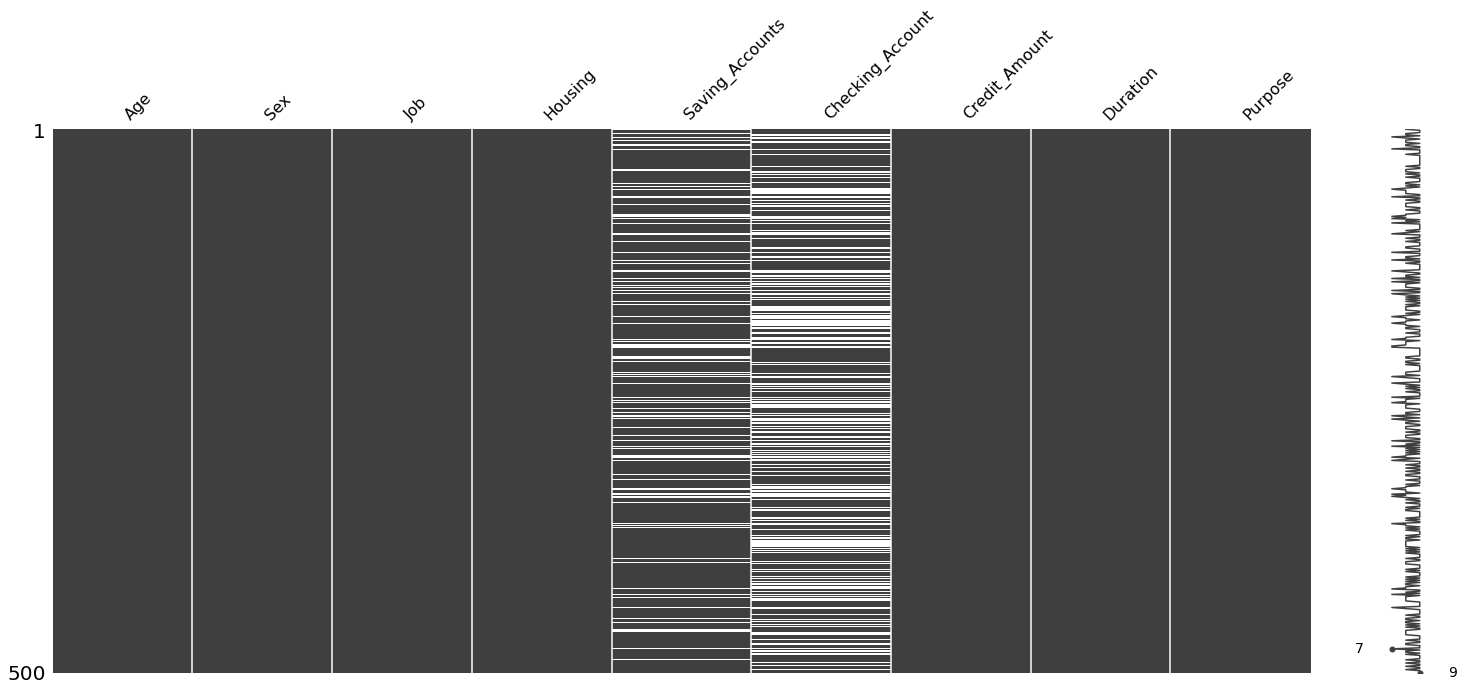

In [22]:
msno.matrix(germen_credit.sample(500))

# Observation Summary
In the matrix plot, each white line represents missing observations and the lines are visualized in the order they appear in the dataset, top to bottom.
With reference to above matrix two columns Saving_Account and Checking_Account are spotted with null values.

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

This visualization will comfortably accommodate up to 09 labelled variables. 

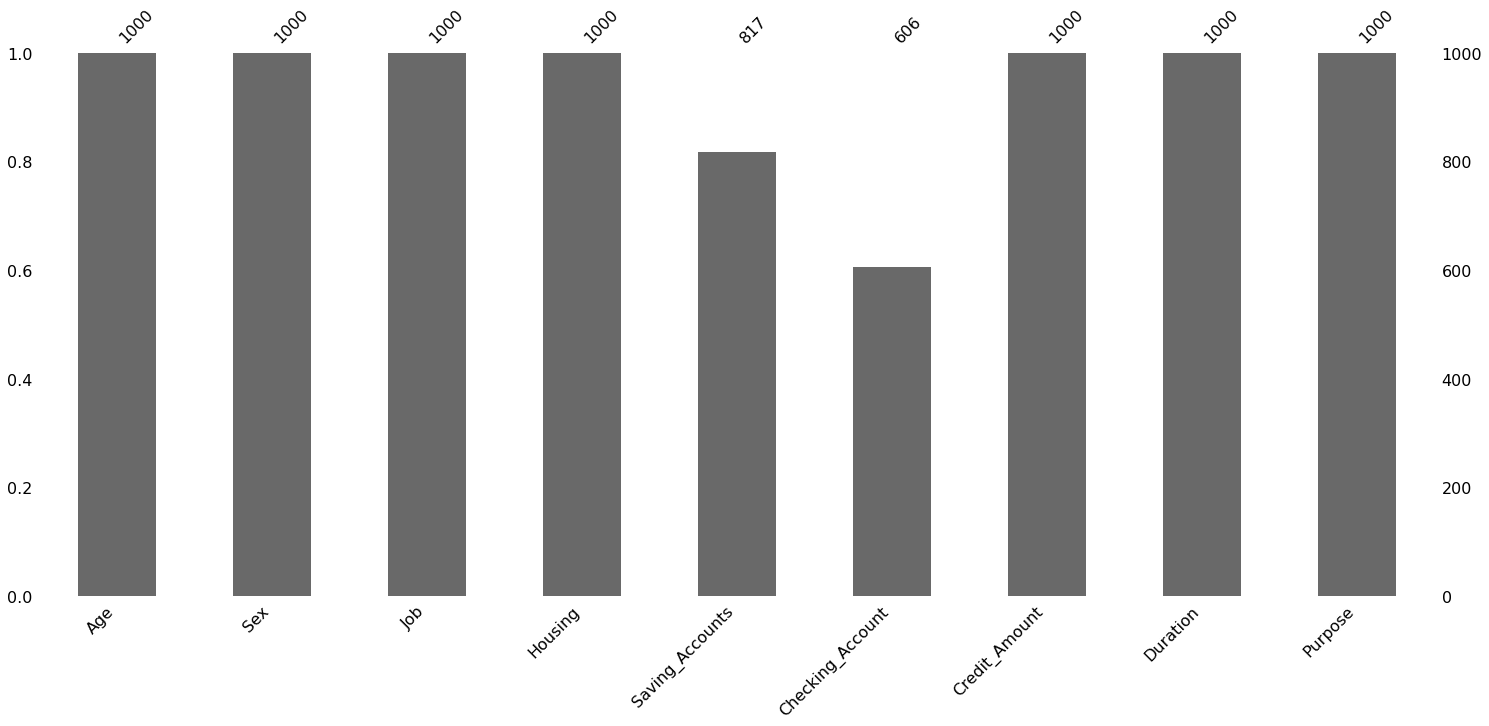

In [23]:
#msno.bar is a simple visualization of nullity by column:
msno.bar(germen_credit.sample(1000))

With reference to above Bar graph two columns Saving_Account and Checking_Account are spotted with null values.


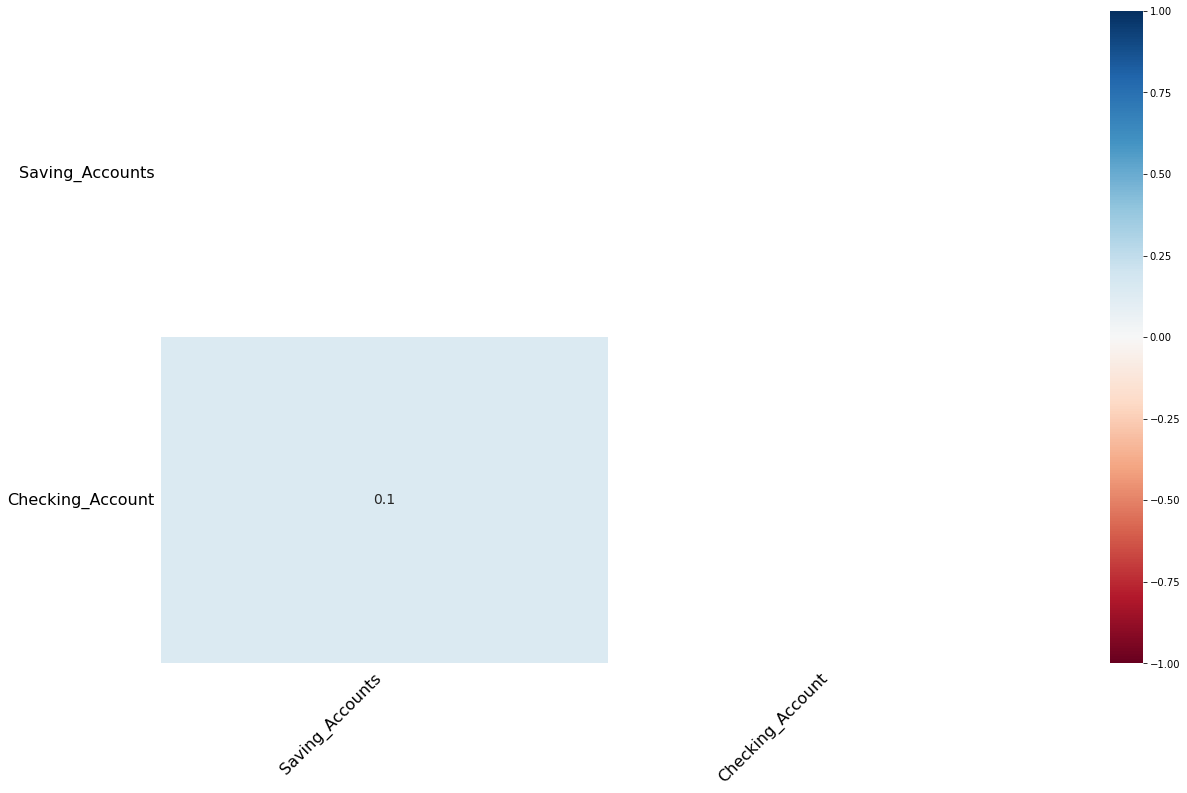

In [24]:
# To check the missingno correlation heatmap measures nullity correlation.
msno.heatmap(germen_credit)

The correlation heatmap will only include columns with missing values in the plot. The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.The above heatmap show no linear corelationship between spotted variables.It has Missing Completely At Random, MCAR pattern of missing values.

# 3.	Conduct the following data pre-processing steps only as necessary along with the reason behind doing it with suitable steps;
a.	Missing values
b.	Erroneous/wrong values
c.	Skewed data
d.	Outliers


# Preprocessing
Before starting deal with-

a.	Missing values

b.	Erroneous/wrong values

c.	Skewed data

d.	Outliers

I drawing some charts in order to find out and demonstrate insights in dataset

In [25]:
#Statistical measurement of relationship strength between variables
#To check corelations between numeric variables
corr = germen_credit[['Credit_Amount','Duration','Age']].corr()
corr

,Credit_Amount,Duration,Age
Credit_Amount,1.000000,0.624984,0.032716
Duration,0.624984,1.000000,-0.036136
Age,0.032716,-0.036136,1.000000


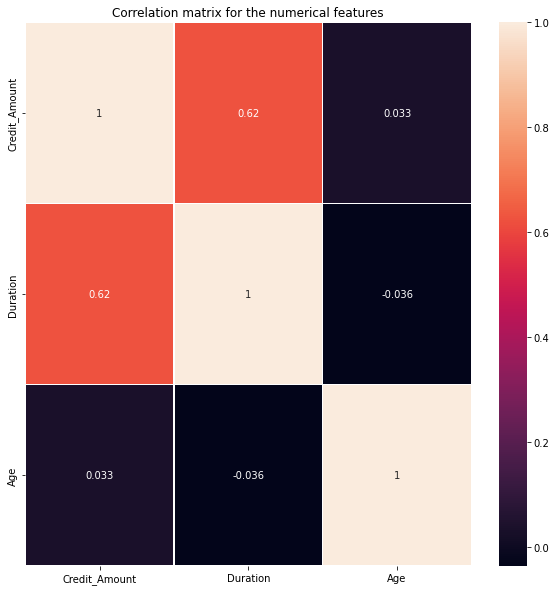

In [26]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(corr, annot=True, linewidth=0.5)
ax.set_title("Correlation matrix for the numerical features")
plt.show()

Observations:
The numeric variables in dataset has no linear corelationship

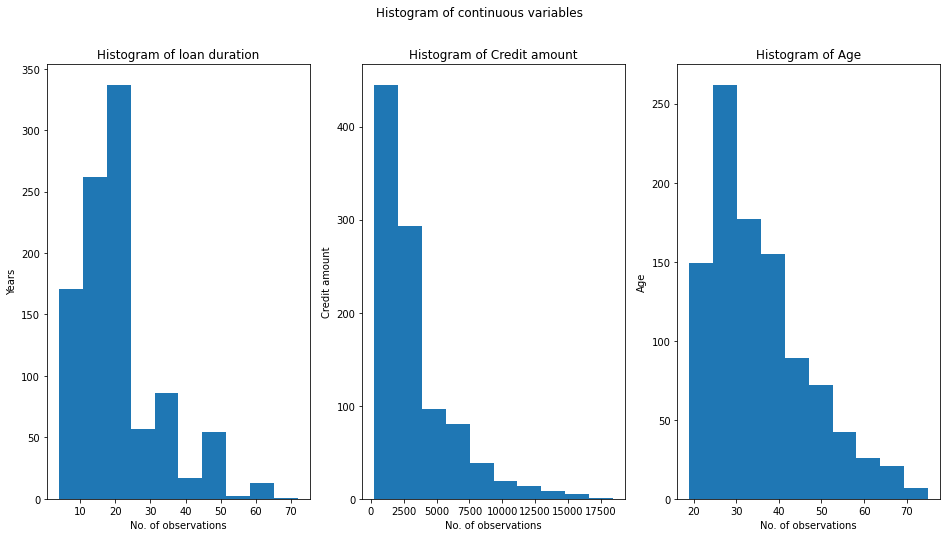

In [27]:
# histograms of continues variables

fig, axes = plt.subplots(1,3, figsize=(16,8))
plt.suptitle('Histogram of continuous variables')
axes[0].hist(germen_credit['Duration'])
axes[0].set_xlabel('No. of observations')
axes[0].set_ylabel('Years')
axes[0].set_title('Histogram of loan duration');

axes[1].hist(germen_credit['Credit_Amount'])
axes[1].set_xlabel('No. of observations')
axes[1].set_ylabel('Credit amount')
axes[1].set_title('Histogram of Credit amount');

axes[2].hist(germen_credit['Age'])
axes[2].set_xlabel('No. of observations')
axes[2].set_ylabel('Age')
axes[2].set_title('Histogram of Age');

Observations

At the glance of the distribution of the continues variables shows that the variables are right skewed.


In [28]:
germen_credit.columns


Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_Accounts', 'Checking_Account',
       'Credit_Amount', 'Duration', 'Purpose'],
      dtype='object')

Text(3, -100, 'Highly Skilled')

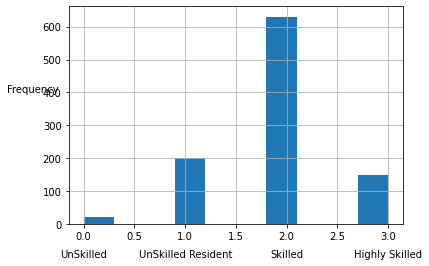

In [29]:
#To Check Frequency of job column
fig = germen_credit["Job"].hist()
fig.text(-0.5, 400, 'Frequency', ha='center')
fig.text(0, -100, 'UnSkilled', ha='center')
fig.text(1, -100, 'UnSkilled Resident', ha='center')
fig.text(2, -100, 'Skilled', ha='center')
fig.text(3, -100, 'Highly Skilled', ha='center')

Observations:
The frequency of skilled job holders is higher upto 650.
Unskilled Resident frequency is 200 and Highly skilled job holder frequencyis 150.

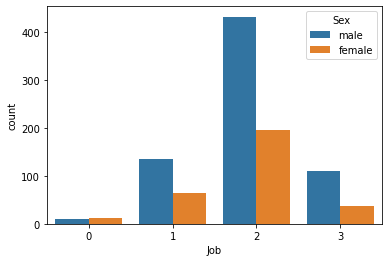

In [30]:
#To check genderwise count of job holders
sns.countplot(x='Job',hue='Sex',data=germen_credit)

Observations:
The genderwise count of of skilled job holders including Male and Female is higher.


In [31]:
# Sex Vs Age cross Tabutation
SexAge = germen_credit.loc[:,['Sex','Age']]
fig = px.box(SexAge, x="Sex", y="Age", points="all",color="Sex")
fig.update_layout(
    title={
          'text':"Sex Vs Age Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Sex",
    yaxis_title="Age",
   
)
fig.show()

A box plot is a statistical representation of numerical data through their quartiles. The ends of the box represent the lower and upper quartiles, while the median (second quartile) is marked by a line inside the box.
The first box plot displays males min age=20 ,Median=35,Q1=28,Q3=43 and Max age=75 and Female ages min=19,median=29,q1=24,q3=37 and max age=75 observed in dataset.


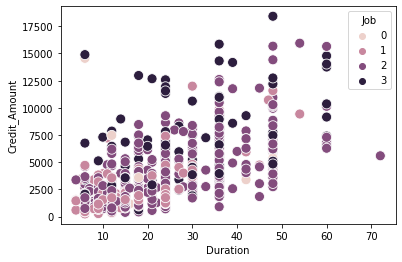

In [32]:
#Relationship between the credit amount and duration
sns.scatterplot(y=germen_credit.Credit_Amount, 
                x=germen_credit.Duration, 
                hue=germen_credit.Job, 
                s=100, 
                )

Observations

The scatter plot shows that in general, larger loans have longer duration of repayment. Loan distributed more to skilled job holders

# Treating or imputing Missing Values for Saving_Accounts,
Checking_Accounts.

1.   To impute values in Saving Accounts and Checking Account i used mode imputation because both are categorical columns.
2.   



In [33]:
#df['salary'] = df['salary'].fillna(df['salary'].mode()[0])
germen_creditmode=germen_credit.copy(deep=True)#creating copy for further manupulation
mode_imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent') 
germen_creditmode.iloc[:,:]=mode_imputer.fit_transform(germen_creditmode)
#germen_creditmode.loc[['Saving_Accounts','Checking_Accounts']]=mode_imputer.fit_transform(germen_creditmode)

In [34]:
germen_creditmode['Saving_Accounts'].unique()#Verifiying Null Imputation

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

#Working with Outliers

In [35]:
germen_credit.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_Accounts   817 non-null    object
 5   Checking_Account  606 non-null    object
 6   Credit_Amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 118.1+ KB


In [36]:

from scipy import stats #Importing stats from scipi
#checking outliers 
z = np.abs(stats.zscore(germen_credit['Age']))

threshold = 3
 
print(np.where(z > 3))# Position of the outlier

(array([163, 186, 330, 430, 536, 606, 756]),)


In [37]:
#checking outliers 
z = np.abs(stats.zscore(germen_credit['Credit_Amount']))

threshold = 3
 
print(np.where(z > 3))# Position of the outlier

(array([ 18,  63,  87,  95, 105, 236, 272, 274, 373, 374, 378, 381, 395,
       563, 615, 637, 714, 744, 763, 818, 832, 887, 915, 917, 921]),)


In [38]:
#checking outliers 
z = np.abs(stats.zscore(germen_credit['Duration']))

threshold = 3
 
print(np.where(z > 3))# Position of the outlier

(array([ 29, 134, 255, 332, 373, 374, 616, 637, 672, 677, 685, 714, 938,
       973]),)


In [39]:
#creating seprate Dataframe of numeric and having outlier columns
germen_credit_num=germen_credit[['Age','Credit_Amount','Duration']]



In [40]:
#Outliers Removal using Zscore
germen_credit[(np.abs(stats.zscore(germen_credit['Age'])) < 3)]
germen_credit[(np.abs(stats.zscore(germen_credit['Credit_Amount'])) < 3)]
germen_credit[(np.abs(stats.zscore(germen_credit['Duration'])) < 3)]


,Age,Sex,Job,Housing,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


#Handling Skewed Data and transform to Normal Distribution using log Transformation


(array([ 30., 160., 144., 149., 173., 126.,  93.,  57.,  50.,  18.]),
 array([2.94443898, 3.08174389, 3.21904881, 3.35635372, 3.49365863,
        3.63096355, 3.76826846, 3.90557337, 4.04287829, 4.1801832 ,
        4.31748811]),
 <a list of 10 Patch objects>)

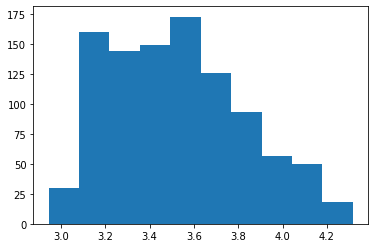

In [41]:
germen_credit['Age'] = np.log(germen_credit['Age'])
  
# Show the dataframe
plt.hist(germen_credit['Age'])

(array([  7.,  16.,  69., 175., 198., 194., 155., 109.,  55.,  22.]),
 array([5.52146092, 5.95145577, 6.38145062, 6.81144547, 7.24144033,
        7.67143518, 8.10143003, 8.53142488, 8.96141974, 9.39141459,
        9.82140944]),
 <a list of 10 Patch objects>)

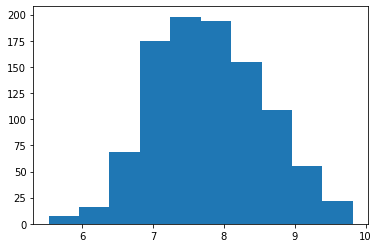

In [42]:
germen_credit['Credit_Amount'] = np.log(germen_credit['Credit_Amount'])
  
# Show the dataframe
plt.hist(germen_credit['Credit_Amount'])

(array([  7.,  80.,  56., 216.,  74., 153., 241.,  92.,  65.,  16.]),
 array([1.38629436, 1.67533154, 1.96436871, 2.25340589, 2.54244306,
        2.83148024, 3.12051742, 3.40955459, 3.69859177, 3.98762894,
        4.27666612]),
 <a list of 10 Patch objects>)

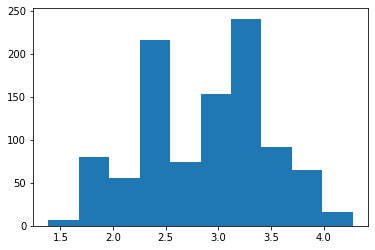

In [43]:
germen_credit['Duration'] = np.log(germen_credit['Duration'])
  
# Show the dataframe
plt.hist(germen_credit['Duration'])

Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. 

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. I applied log tranformation and reomove outliers from target columns to convert right skewed data into normal distribution.

# 4.	Perform exploratory data analysis and provide key insights derived from the same backed with suitable graphs and plots. Few hints to get you started;
a.	Distribution of numerical variables

b.	Distribution of categorical variables

c.	Numerical vs Categorical plots

d.	Numerical vs Numerical plots


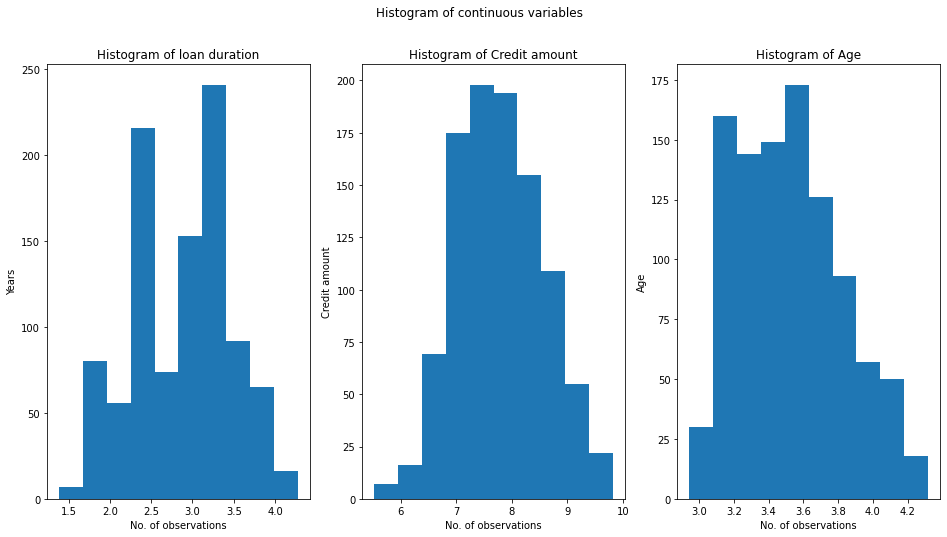

In [44]:
#Distribution of numerical variables
fig, axes = plt.subplots(1,3, figsize=(16,8))
plt.suptitle('Histogram of continuous variables')
axes[0].hist(germen_credit['Duration'])
axes[0].set_xlabel('No. of observations')
axes[0].set_ylabel('Years')
axes[0].set_title('Histogram of loan duration');

axes[1].hist(germen_credit['Credit_Amount'])
axes[1].set_xlabel('No. of observations')
axes[1].set_ylabel('Credit amount')
axes[1].set_title('Histogram of Credit amount');

axes[2].hist(germen_credit['Age'])
axes[2].set_xlabel('No. of observations')
axes[2].set_ylabel('Age')
axes[2].set_title('Histogram of Age');


Observations

At the glance of the distribution of the continues variables shows that the variables are right skewed.

# Distribution of Categorical Variable

Text(3, -100, 'Highly Skilled')

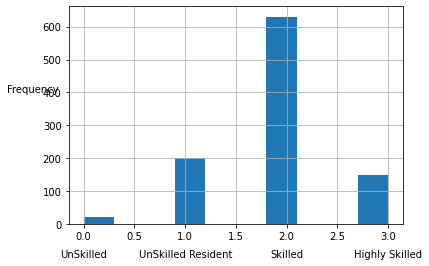

In [45]:
#To Check Frequency of job column
fig = germen_credit["Job"].hist()
fig.text(-0.5, 400, 'Frequency', ha='center')
fig.text(0, -100, 'UnSkilled', ha='center')
fig.text(1, -100, 'UnSkilled Resident', ha='center')
fig.text(2, -100, 'Skilled', ha='center')
fig.text(3, -100, 'Highly Skilled', ha='center')

Observations:
The frequency of skilled job holders is higher upto 650.
Unskilled Resident frequency is 200 and Highly skilled job holder frequencyis 150.

In [46]:
germen_credit["Housing"].unique()

array(['own', 'free', 'rent'], dtype=object)

Text(2, -100, 'rent')

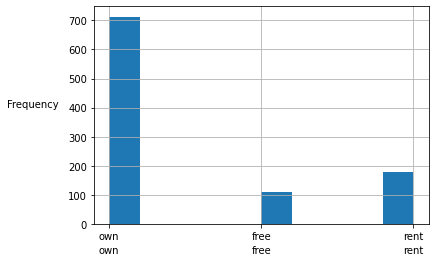

In [47]:
#To Check Frequency distribution of Housing column
fig = germen_credit["Housing"].hist()
fig.text(-0.5, 400, 'Frequency', ha='center')
fig.text(0, -100, 'own', ha='center')
fig.text(1, -100, 'free', ha='center')
fig.text(2, -100, 'rent', ha='center')


Observations: The frequency of housing holders for own is more than 700. living in rent houses are around 200 and free house holder frequency is 100.

[Text(0, 0, 'radio/TV'),
 Text(0, 0, 'education'),
 Text(0, 0, 'furniture/equipment'),
 Text(0, 0, 'car'),
 Text(0, 0, 'business'),
 Text(0, 0, 'domestic appliances'),
 Text(0, 0, 'repairs'),
 Text(0, 0, 'vacation/others')]

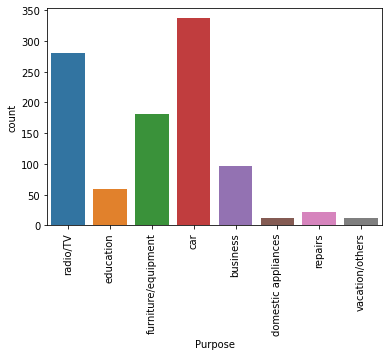

In [48]:
#To check purpose frequency  count  
chart=sns.countplot(x='Purpose',data=germen_credit)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Observations: 
The frequency count of purpose of loan takers is highly for purchasing car ,radio/TV and furniture equipments.

In [49]:
germen_credit.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_Accounts', 'Checking_Account',
       'Credit_Amount', 'Duration', 'Purpose'],
      dtype='object')

#	Numerical vs Categorical plots

In [50]:
#Purpose Vs Credit Amount Cross tabulation
PVsC =germen_credit.loc[:,['Purpose','Credit_Amount']]
fig = px.box(PVsC, x="Purpose", y="Credit_Amount", color="Purpose")
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(
    title={
          'text':"Purpose Vs Credit Amount Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Purpose",
    yaxis_title="Credit amount",
   
)
fig.show()

Observations: 
Purpose Vs Credit Amount Cross tabulation shows the relationship between Credit amount and Purpose of the loan.
The most of the credit holder take loan for the purchasing car and vacation/other purposes

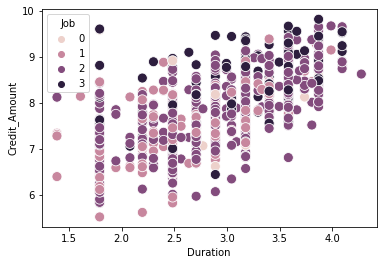

In [51]:
#Relationship between the credit amount and duration
sns.scatterplot(y=germen_credit.Credit_Amount, 
                x=germen_credit.Duration, 
                hue=germen_credit.Job, 
                s=100, 
                )

Observations

The scatter plot shows that in general, larger loans have longer duration of repayment. Loan distributed more to skilled job holders

#Numerical vs Numerical plots

Text(0.5, 1.0, 'Credit amount and Duration Relationship')

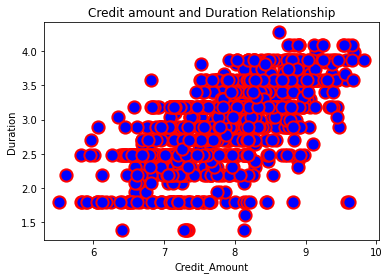

In [54]:
plt.scatter(germen_credit['Credit_Amount'], germen_credit['Duration'], c ="blue",linewidths = 2, edgecolor ="red",s =150 )
plt.xlabel("Credit_Amount")
plt.ylabel("Duration")
plt.title("Credit amount and Duration Relationship")



Observations:

The scatter Plot shows relationship between Credit Amount and Duration.The high credit shows higher duration to repay amount